In [6]:
from matplotlib.pylab import *
from dtcwt_jax.numpyy.transform3d import Transform3d
GRID_SIZE = 64
SPHERE_RAD = int(0.45 * GRID_SIZE) + 0.5


grid = np.arange(-(GRID_SIZE>>1), GRID_SIZE>>1)
X, Y, Z = np.meshgrid(grid, grid, grid)
r = np.sqrt(X*X + Y*Y + Z*Z)

sphere = 0.5 + 0.5 * np.clip(SPHERE_RAD-r, -1, 1)

from testUtils.spleenTest import get_spleen_data
cached_subj =get_spleen_data()[0]
sample_3d_ct=cached_subj[0][0,0,:,:,:]


data loaded from hdf5


In [15]:
trans = Transform3d()
discard_level_1=False
sample_3d_ct_t = trans.forward(sample_3d_ct, nlevels=8,discard_level_1=discard_level_1)

In [16]:
print(sample_3d_ct_t.lowpass.shape)
# print(sample_3d_ct_t.highpasses[0].shape)
# print(sphere_t.scales.shape)

(2, 2, 2)


In [17]:
Z = trans.inverse(sample_3d_ct_t)
# print(np.abs(Z - sample_3d_ct).max()) # Should be < 1e-12

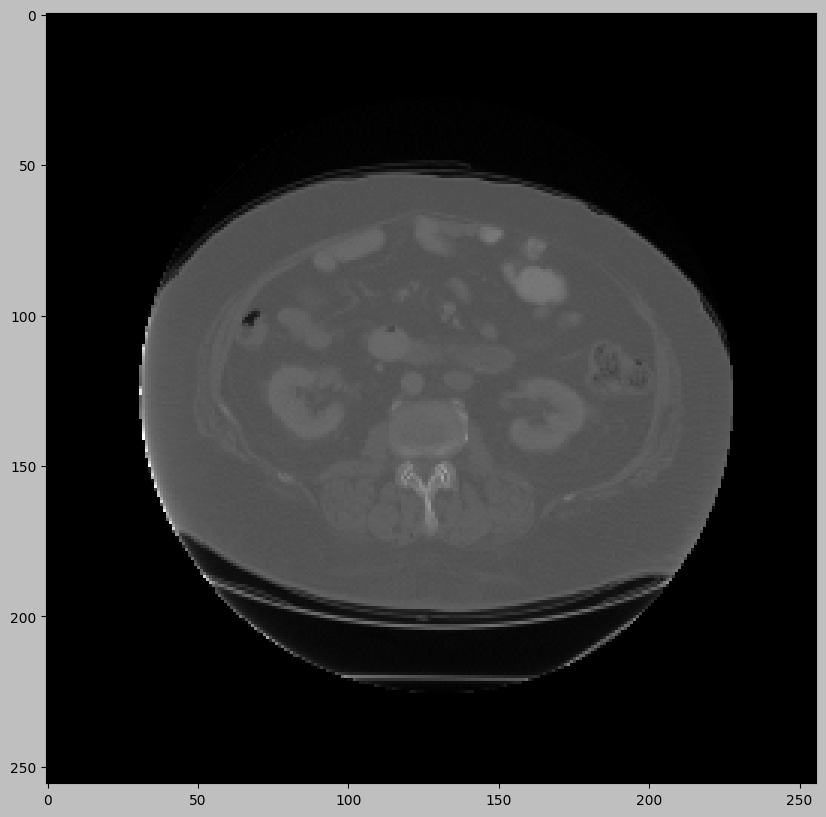

In [18]:
plt.figure(figsize=(20, 10))
plt.style.use('grayscale')
plt.imshow(np.rot90(Z[:,:,32]))